## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This magic command is used in Jupyter notebooks to display plots inline (directly in the notebook)
# It ensures that any plot created with matplotlib will be shown right below the code cell
%matplotlib inline


## load titanic dataset 

In [3]:
# Load the 'titanic' dataset from seaborn's built-in datasets
df = sns.load_dataset("titanic")

# Uncomment the line below to load data from a CSV file using pandas (replace 'link' with the actual file path or URL)
# data = pd.read_csv("link")


In [4]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Check for missing (null) values in each column of the DataFrame and return the count of missing values
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df["deck"].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [10]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [11]:
# Map the 'class' column values to numeric values and compare them with the 'pclass' column values
# Check if the mapping is equal to the 'pclass' column for all rows in the DataFrame
(df['class'].map({
    'First': 1,
    'Second': 2,
    'Third': 3,
}) == df['pclass']).all()


np.True_

In [12]:
# Map the 'alive' column values ('yes' and 'no') to numeric values (1 and 0)
# Then compare the mapped values with the 'survived' column and check if they are equal for all rows
(df.alive.map({
    'yes': 1,
    'no': 0,
}) == df.survived).all()


np.True_

---

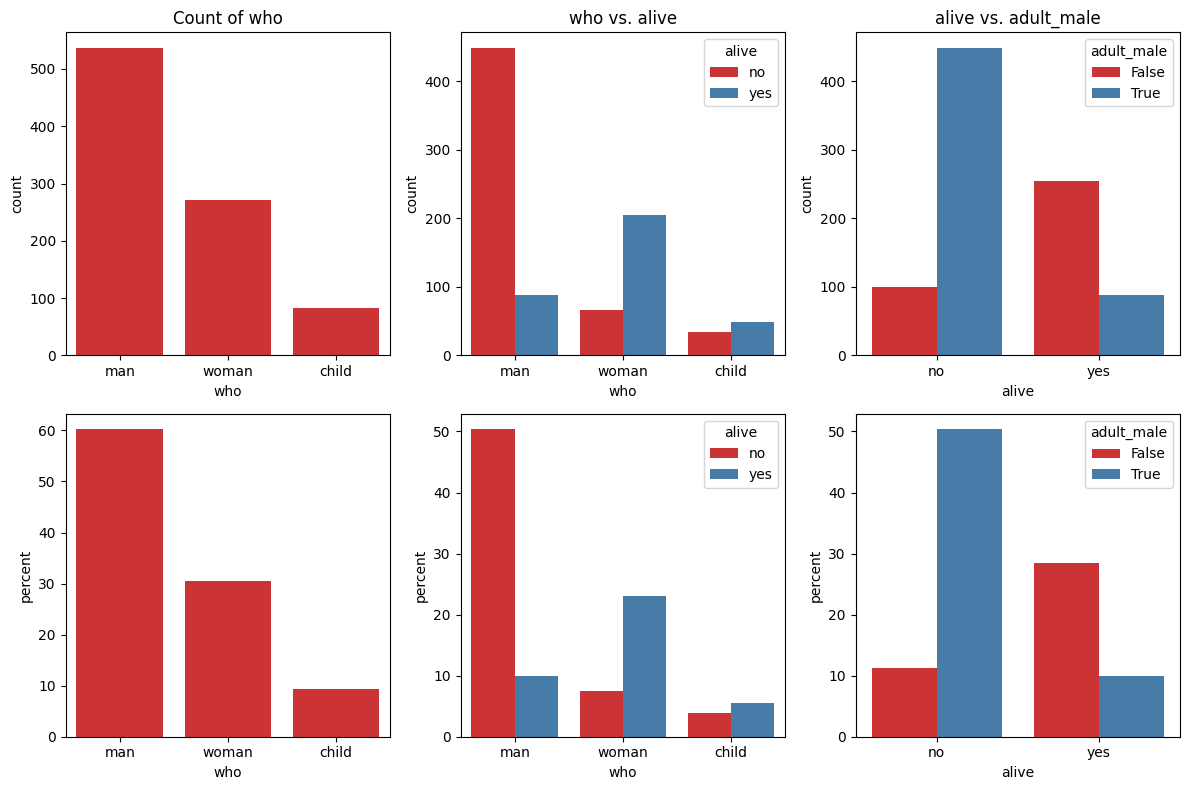

In [13]:
# Set the color palette to "Set1" for the plots
with sns.color_palette("Set1"):
    # Create a 2x3 grid of subplots with a figure size of 12x8 inches
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))

    # First plot: Count of 'who' (gender) in the dataset
    sns.countplot(df, x="who", ax=axes[0, 0])

    # Second plot: Count of 'who' with hue 'alive' to show survival status
    sns.countplot(df, x="who", hue="alive", ax=axes[0, 1])

    # Third plot: Count of 'alive' vs 'adult_male' status
    sns.countplot(df, hue="adult_male", x="alive", ax=axes[0, 2])

    # Fourth plot: Percentage distribution of 'who'
    sns.countplot(df, x="who", ax=axes[1, 0], stat="percent")

    # Fifth plot: Percentage distribution of 'who' with hue 'alive'
    sns.countplot(df, x="who", hue="alive", ax=axes[1, 1], stat="percent")

    # Sixth plot: Percentage distribution of 'alive' vs 'adult_male'
    sns.countplot(df, hue="adult_male", x="alive", ax=axes[1, 2], stat="percent")

    # Set titles for each plot
    axes[0, 0].set_title("Count of who")
    axes[0, 1].set_title("who vs. alive")
    axes[0, 2].set_title("alive vs. adult_male")

    # Adjust layout to prevent overlap of titles and labels
    plt.tight_layout()


---

/tmp/ipykernel_33472/1175798785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(df, col="alone", x="alive", kind="count", row="who", height=4, palette="Reds")


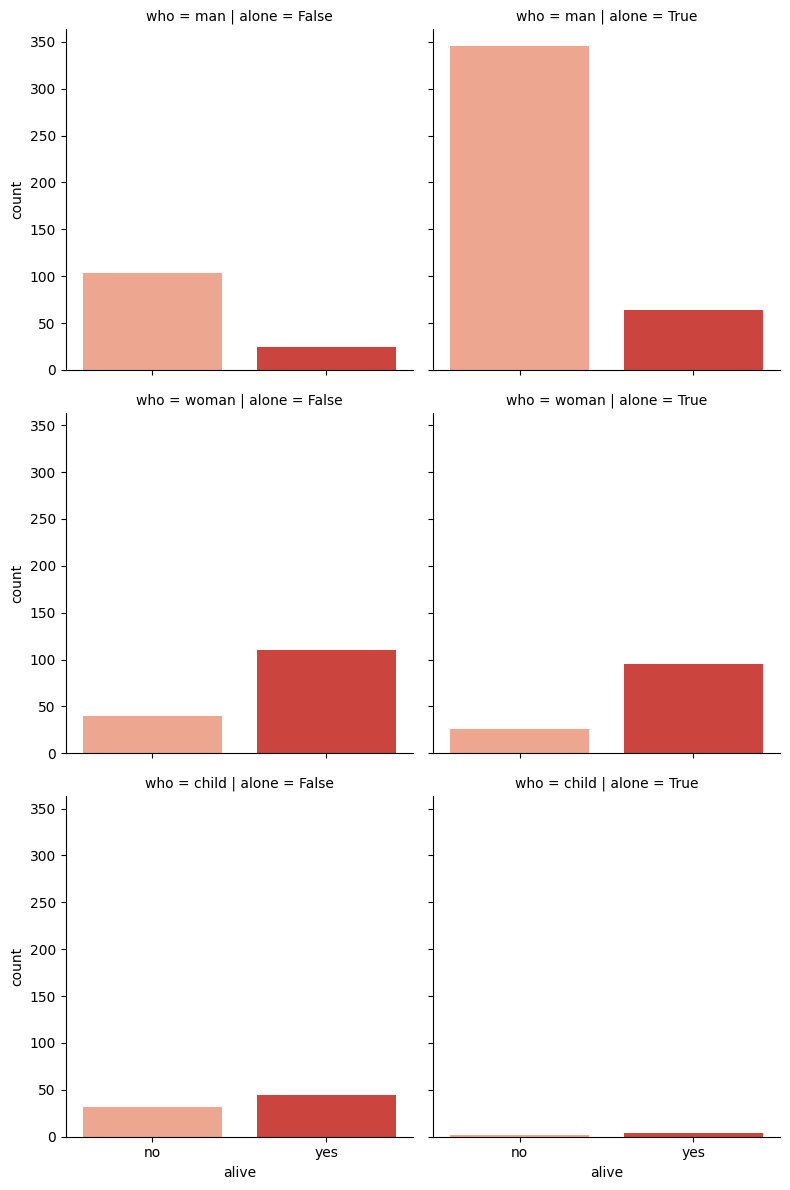

In [14]:
# Create a categorical plot (catplot) to visualize the distribution of 'alive' by 'who' and 'alone' columns
# The plot type is 'count', which shows the count of occurrences for each combination of 'alive' and 'who' grouped by 'alone'
sns.catplot(df, col="alone", x="alive", kind="count", row="who", height=4, palette="Reds")


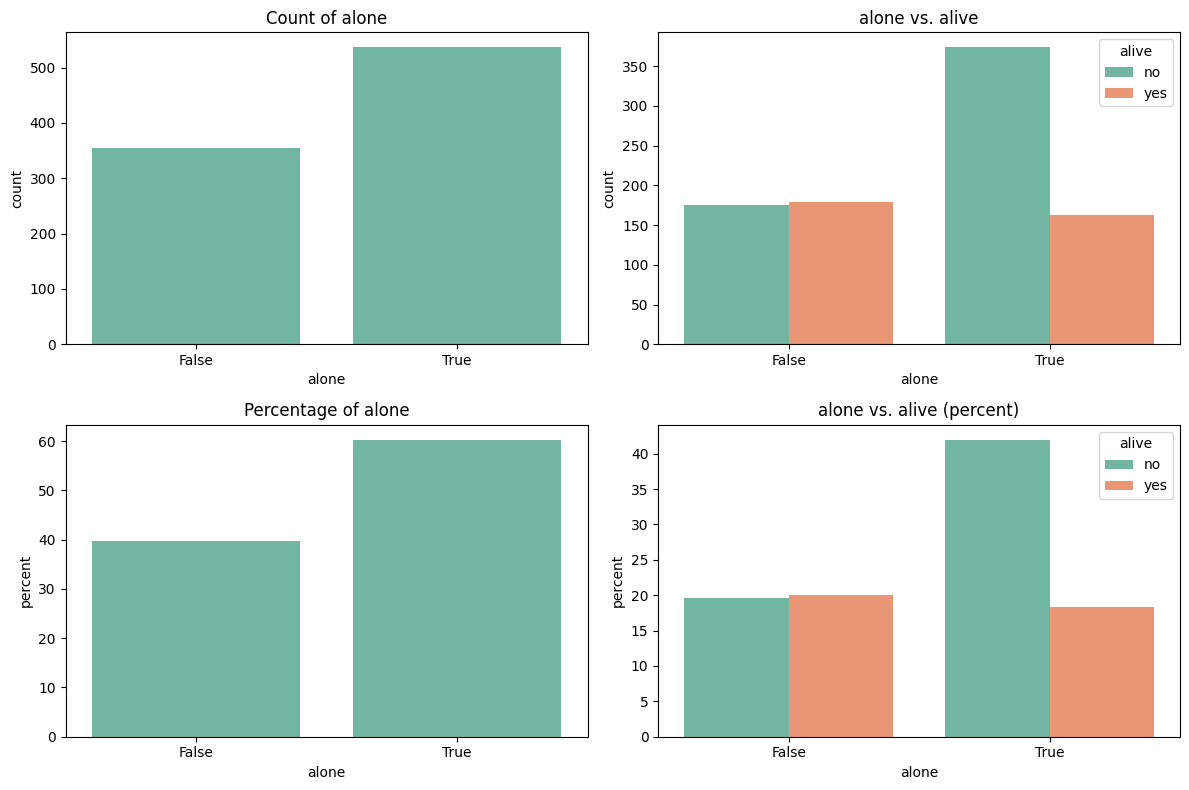

In [15]:
# Set the color palette to "Set2" for the plots
with sns.color_palette("Set2"):
    # Create a 2x2 grid of subplots with a figure size of 12x8 inches
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # First plot: Count of 'alone' in the dataset
    sns.countplot(df, x="alone", ax=axes[0, 0])

    # Second plot: Count of 'alone' with hue 'alive' to show survival status
    sns.countplot(df, x="alone", hue="alive", ax=axes[0, 1])

    # Third plot: Percentage distribution of 'alone'
    sns.countplot(df, x="alone", ax=axes[1, 0], stat="percent")

    # Fourth plot: Percentage distribution of 'alone' with hue 'alive'
    sns.countplot(df, x="alone", hue="alive", ax=axes[1, 1], stat="percent")

    # Set titles for each plot
    axes[0, 0].set_title("Count of alone")
    axes[0, 1].set_title("alone vs. alive")
    axes[1, 0].set_title("Percentage of alone")
    axes[1, 1].set_title("alone vs. alive (percent)")

    # Adjust layout to prevent overlap of titles and labels
    plt.tight_layout()


---

In [16]:
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [17]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [18]:
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
df['fare'].value_counts()


fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64

In [20]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

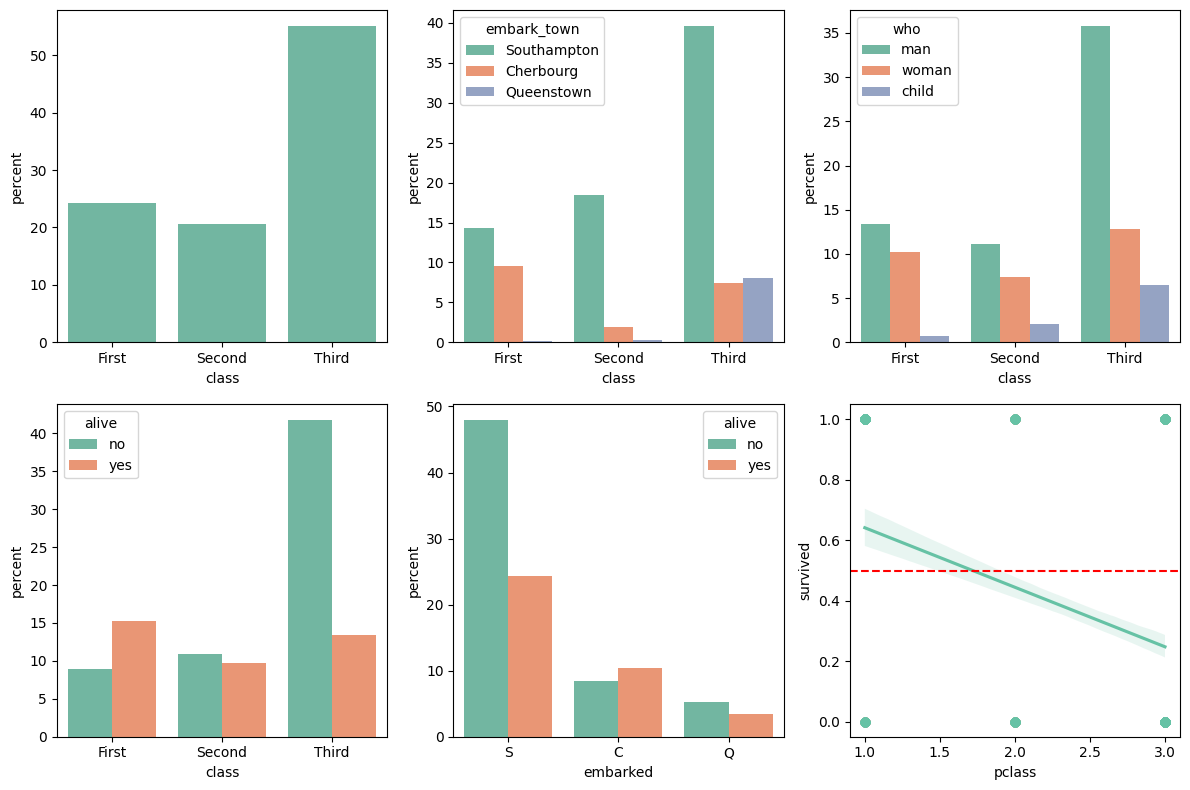

In [21]:
# Set the color palette to "Set2" for the plots
with sns.color_palette("Set2"):
    # Create a 2x3 grid of subplots with a figure size of 12x8 inches
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))

    # First plot: Percentage distribution of 'class'
    sns.countplot(df, x="class", ax=axes[0, 0], stat="percent")

    # Second plot: Percentage distribution of 'class' with hue 'embark_town'
    sns.countplot(df, hue="embark_town", ax=axes[0, 1], stat="percent", x="class")

    # Third plot: Percentage distribution of 'class' with hue 'who' (gender)
    sns.countplot(df, hue="who", ax=axes[0, 2], stat="percent", x="class")

    # Fourth plot: Percentage distribution of 'class' with hue 'alive' (survival status)
    sns.countplot(df, x="class", ax=axes[1, 0], stat="percent", hue="alive")

    # Fifth plot: Percentage distribution of 'embarked' with hue 'alive'
    sns.countplot(df, hue="alive", x="embarked", stat="percent", ax=axes[1, 1])

    # Sixth plot: Regression plot between 'pclass' (class) and 'survived' (survival status)
    sns.regplot(df, x="pclass", y="survived", ax=axes[1, 2])

    # Add a horizontal line at y=0.5 to highlight the survival threshold
    plt.axhline(0.5, color='r', linestyle='--')

    # Adjust layout to prevent overlap of titles and labels
    plt.tight_layout()


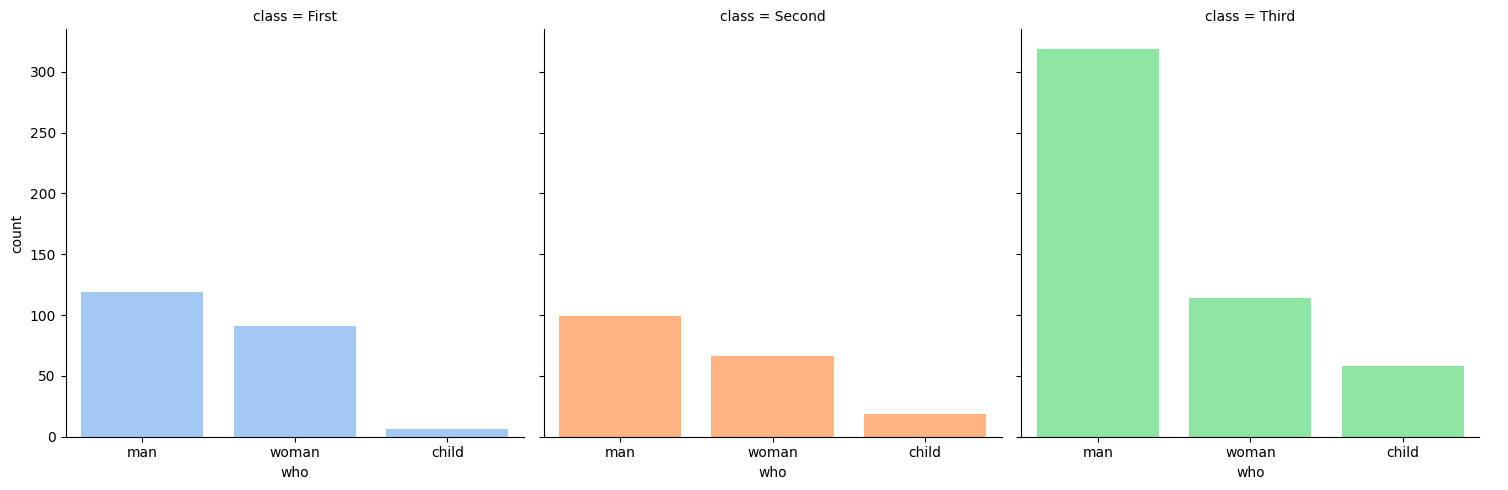

In [22]:
# Get unique values of the 'class' column and assign a color for each class using a pastel color palette
classes = df["class"].unique()  # Extract unique classes from the 'class' column
colors = sns.color_palette("pastel", len(classes))  # Generate a pastel color palette with the same length as the number of unique classes

# Create a FacetGrid using seaborn's catplot function to visualize the count distribution of 'who' for each 'class'
g = sns.catplot(df, x="who", col="class", kind="count")

# Set individual x-limits and apply custom colors to the patches (bars) in each plot
for ax, color in zip(g.axes.flat, colors):
    for patch in ax.patches:  # Iterate through each patch (bar) in the plot
        patch.set_facecolor(color)  # Set the face color of each patch (bar) to the corresponding color

# Display the plot
plt.show()


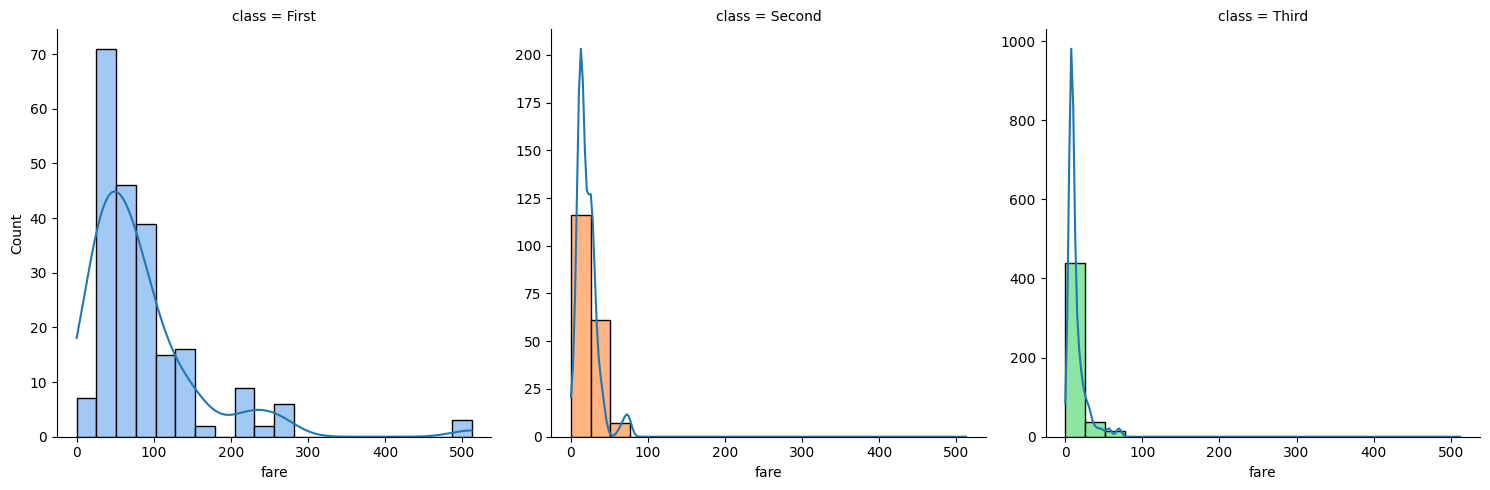

In [23]:
# Extract unique passenger classes from the 'class' column
classes = df["class"].unique()

# Generate a pastel color palette with one color per class
colors = sns.color_palette("pastel", len(classes))

# Create a histogram with KDE (kernel density estimate) for 'fare', 
# faceted by passenger class, with separate y-axes for each facet
g = sns.displot(
    df,
    x="fare",           # variable to plot on the x-axis
    col="class",        # create one facet per passenger class
    kind="hist",        # draw a histogram
    bins=20,            # number of bins in each histogram
    kde=True,           # overlay a KDE curve on each histogram
    facet_kws={'sharey': False}  # allow each facet its own y-axis scale
)

# Apply the custom pastel colors to the histogram bars in each facet
for ax, color in zip(g.axes.flat, colors):
    for patch in ax.patches:
        patch.set_facecolor(color)

# Render the plot
plt.show()


---

In [24]:
# Map the boolean 'alone' column to numeric values: True → 1, False → 0
df['alone_num'] = df['alone'].map({
    True: 1,
    False: 0,
})

# Map the categorical 'who' column to numeric codes: man → 1, woman → 2, child → 3
df['who_num'] = df['who'].map({
    'man': 1,
    'woman': 2,
    'child': 3,
})

# Select only the numeric columns (integer and float types) from the DataFrame
df_numerical = df.select_dtypes(include=['int64', 'float64'])

# Display the resulting numeric-only DataFrame
df_numerical


,survived,pclass,age,sibsp,parch,fare,alone_num,who_num
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,2
2,1,3,26.0,0,0,7.9250,1,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,1
887,1,1,19.0,0,0,30.0000,1,2
888,0,3,NaN,1,2,23.4500,0,2
889,1,1,26.0,0,0,30.0000,1,1


<Axes: >

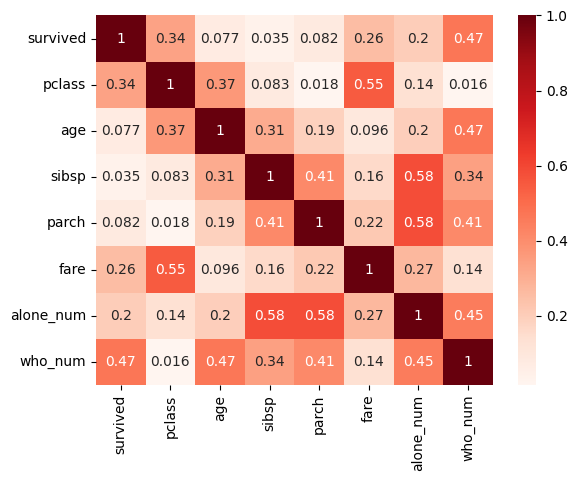

In [25]:
# Compute the absolute correlation matrix for all numeric columns
corr_matrix = df_numerical.corr().abs()

# Draw a heatmap of the correlations, annotate each cell with its value, using a red color map
sns.heatmap(
    corr_matrix,    # matrix of absolute correlation coefficients
    annot=True,     # write the correlation coefficient in each cell
    cmap="Reds"     # use the "Reds" color palette for shading
)
